In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

目标函数 $y=2x$

In [31]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

In [32]:
def forward(x):
  return w * x
# 小批量随机梯度下降法中，计算的是单个批量的loss
def loss(xs, ys):
  loss = 0;
  for x, y in zip(xs, ys):
    y_pred = forward(x)
    loss += (y_pred - y) ** 2
  return loss / len(xs)
# 梯度是单个批量的梯度求和
def gradient(xs, ys):
  grad = 0
  for x, y in zip(xs, ys):
    y_pred = forward(x)
    grad += 2 * x * (y_pred - y)
  return grad / len(xs)

epoch_list = []
loss_list = []

train_size = len(x_data)
batch_size = 2

In [33]:
print('Predict (before training)', 4, forward(4))
for epoch in range(100):
  batch_idx = np.random.choice(train_size, batch_size)
  x_batch = np.array(x_data)[batch_idx]
  y_batch = np.array(y_data)[batch_idx]

  loss_val = loss(x_batch, y_batch)
  grad_val = gradient(x_batch, y_batch)
  w -= 0.01 * grad_val

  epoch_list.append(epoch)
  loss_list.append(loss_val)
  if(epoch % 10 == 0):
    print('epoch:', epoch, 'w=', w, 'loss=', loss_val)
print('Predict (after training)', 4, forward(4))

Predict (before training) 4 4.0
epoch: 0 w= 1.1 loss= 5.0
epoch: 10 w= 1.690374304343856 loss= 1.2831835852096365
epoch: 20 w= 1.8791930447178264 loss= 0.015196085427477203
epoch: 30 w= 1.949592242952658 loss= 0.01568482697866569
epoch: 40 w= 1.9809318747799534 loss= 0.0017183052902049983
epoch: 50 w= 1.9930971572303897 loss= 0.00029413110062938936
epoch: 60 w= 1.9969080281936014 loss= 0.00012796342484246612
epoch: 70 w= 1.9987888366753783 loss= 6.932498104483055e-06
epoch: 80 w= 1.9995795112800911 loss= 1.5183907559898789e-06
epoch: 90 w= 1.9998256177919431 loss= 8.423588500495405e-08
Predict (after training) 4 7.999761247223591


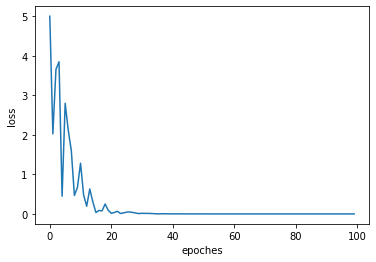

In [34]:
plt.plot(epoch_list, loss_list)
plt.xlabel('epoches')
plt.ylabel('loss')
plt.show()